In [5]:
import glob

import numpy             as np
import matplotlib.pyplot as plt

from CCfun  import filter_df

from CCplot import plot1d
from CCplot import plot2d
from CCplot import plot_line
from CCplot import auto_plot_style
from CCplot import figure_sizes
from CCplot import subplots

from CCdatabase import paper_signals
from CCdatabase import californication_irradiation_mapping

from CCio import load_and_process
from CCio import merge_measurements

In [6]:
%matplotlib inline

auto_plot_style()

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# All data

In [8]:
filenames_pre  = glob.glob("/Users/Gonzalo/github/CCdata/Californication/final/*pre*.h5")
measurements   = merge_measurements(map(load_and_process, filenames_pre))

In [9]:
measurements.crystals.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0       False        4        2          0        1000    516       0.1   
1       False        4        2          0        1000    516       0.1   
2       False        4        2          0        1000    516       0.1   
3       False        4        2          0        1000    516       0.1   
4       False        4        2          0        1000    516       0.1   

   ex_wl    power  em_wl  counts  crystal_id crystal_type  bkgsub    rate  \
0  625.0  0.00001  641.5    4002  CaF_B1_281          CaF   737.0  7370.0   
1  625.0  0.00001  642.0    3967  CaF_B1_281          CaF   702.0  7020.0   
2  625.0  0.00001  642.5    3873  CaF_B1_281          CaF   608.0  6080.0   
3  625.0  0.00001  643.0    3871  CaF_B1_281          CaF   606.0  6060.0   
4  625.0  0.00001  643.5    3824  CaF_B1_281          CaF   559.0  5590.0   

        quantar       dquanta  wheel_no  
0  3.093748e+15  2.382223e-12         0  
1  3.093748e+15  2.269092e-12         0  
2  3.093748e+15  1.965253e-12         0  
3  3.093748e+15  1.958789e-12         0  
4  3.093748e+15  1.806870e-12         0

In [11]:
def plot_bleach(crystal_type, ex_wl, **overrides):
    grating = 1 + int(ex_wl >= 400)
    selections_before = dict(crystal_type = crystal_type,
                             ex_wl        =        ex_wl,
                             exposure     =           10,
                             exp_index    =            1,
                             grating      =      grating,
                             slit_width   =         1000,
                             looparound   =        False)

    selections_before.update(overrides)
    selections_after  = dict(**selections_before)
    selections_after.update(dict(looparound = True))

    gb_before = filter_df(measurements.crystals, selections_before).groupby("crystal_id")
    gb_after  = filter_df(measurements.crystals, selections_after ).groupby("crystal_id")
    crystals = set(list(gb_before.groups.keys()) + list(gb_after.groups.keys()))
    n        = len(crystals)

    plt.figure(figsize=figure_sizes[n])
    for k, crystal_id in enumerate(crystals, start=1):
        before = gb_before.get_group(crystal_id)
        after  = gb_after .get_group(crystal_id)

        assert len(before) == 1600, (len(before), 1600)
        assert len(after ) == 1600, (len(after ), 1600)

        sg_before = before[before.em_wl.values > ex_wl + 30]
        sg_after  = after [after .em_wl.values > ex_wl + 30]

        plt.subplot(*subplots[n], k)
        plot1d(sg_before.em_wl  .values,
               sg_before.dquanta.values,
               label = "before")

        plot1d(sg_after .em_wl  .values,
               sg_after .dquanta.values,
               ylabel = "ph/ph/s"    ,
               title  = crystal_id + " " + californication_irradiation_mapping[crystal_id],
               label  = "after")

        for signal in paper_signals[crystal_type]:
            plot_line(signal, color="b", linestyle=":", label=f"{signal} nm CC")

        ex = ex_wl
        while ex < plt.xlim()[1]:
            plot_line(ex, color="g", linestyle=":")
            ex += ex_wl

        plt.legend()
    plt.tight_layout()

# Sp

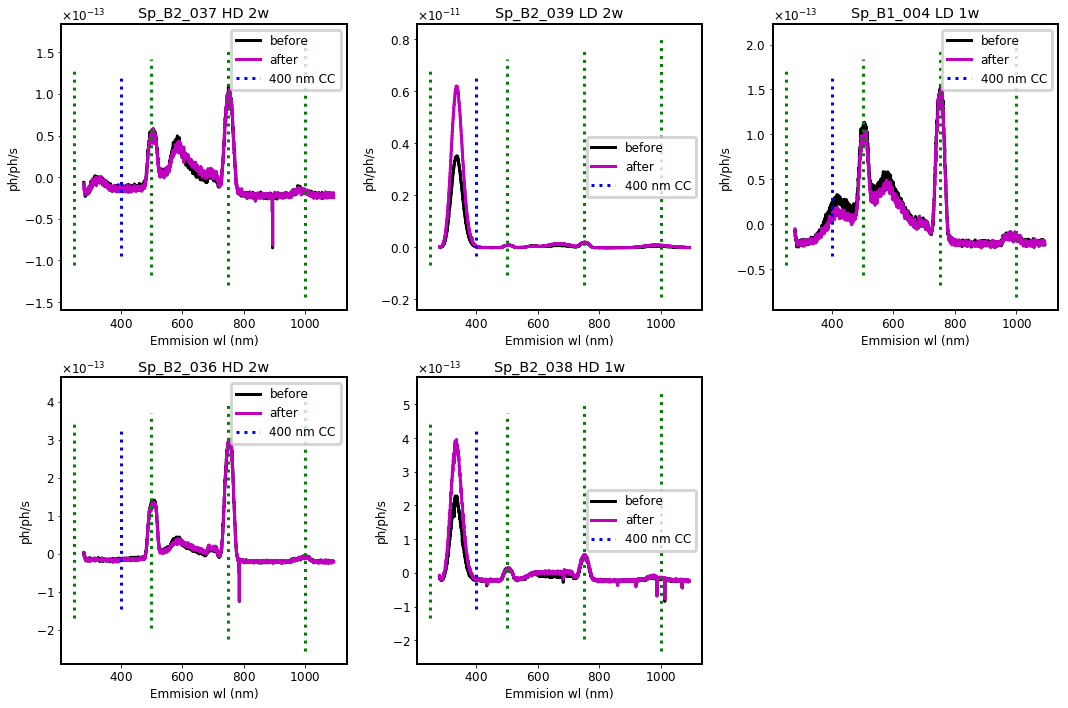

In [13]:
plot_bleach("Sp", 250)

# Qz

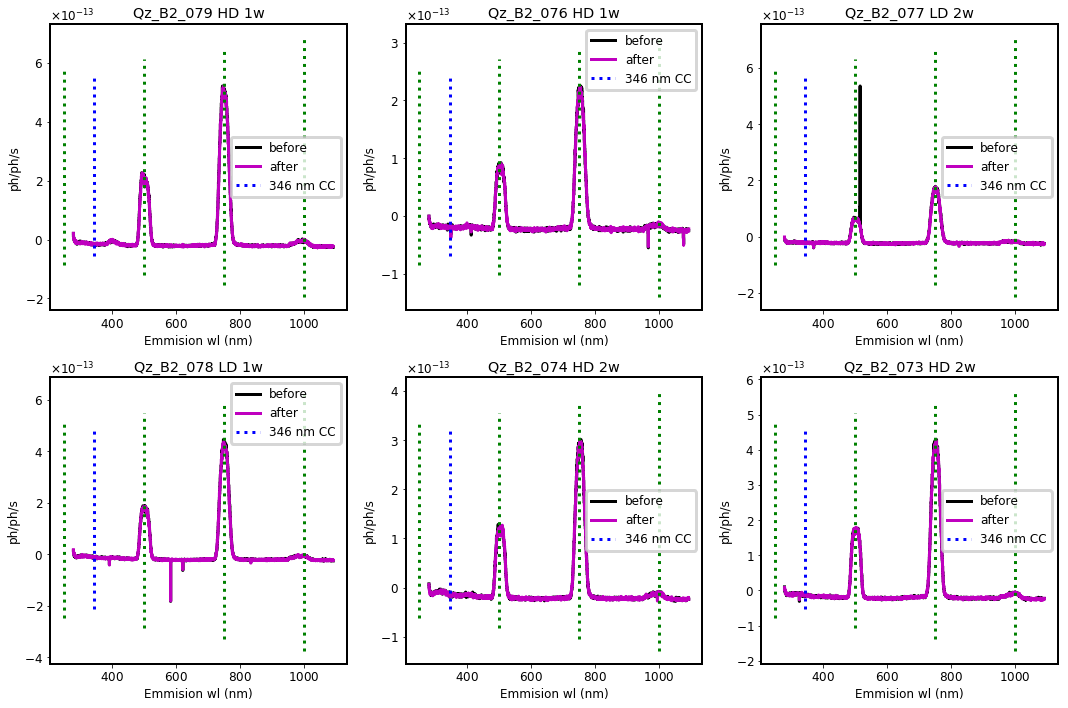

In [14]:
plot_bleach("Qz", 250)

# CaF

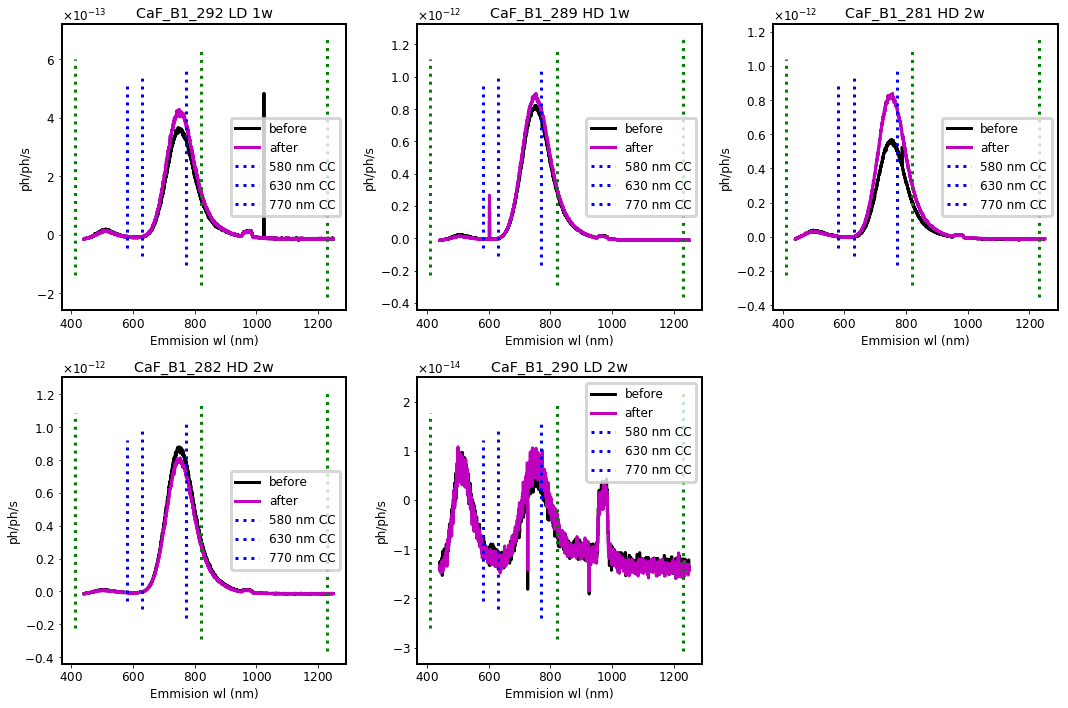

In [15]:
plot_bleach("CaF", 410)

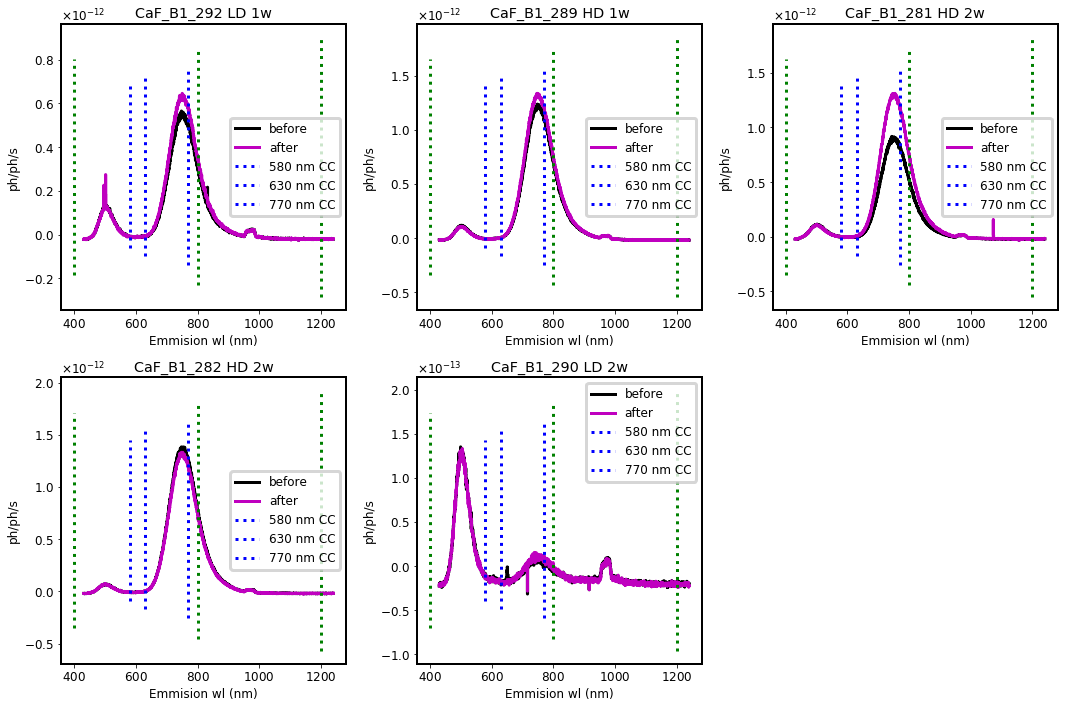

In [16]:
plot_bleach("CaF", 400)

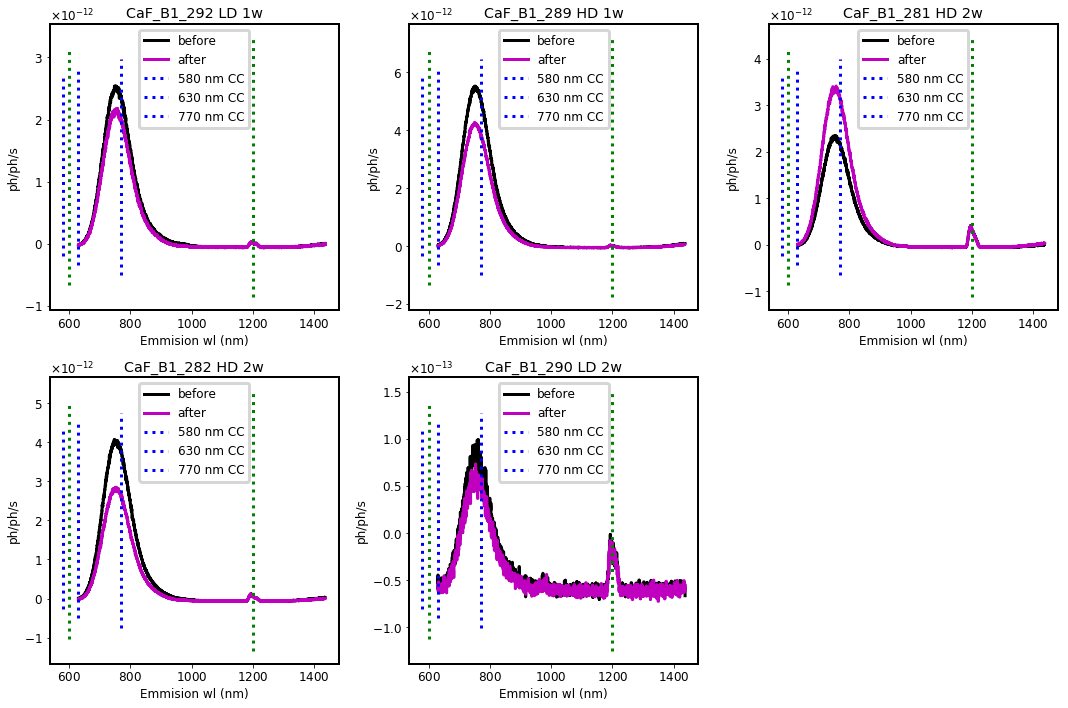

In [17]:
plot_bleach("CaF", 600, exposure=1)

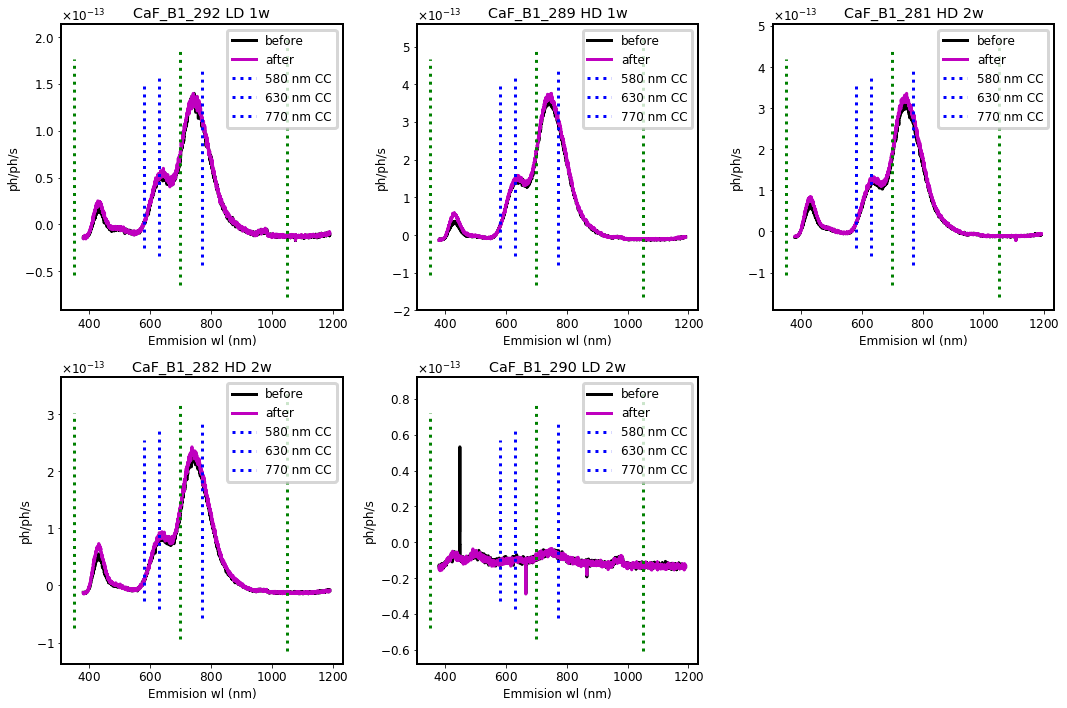

In [18]:
plot_bleach("CaF", 350)

# BaF

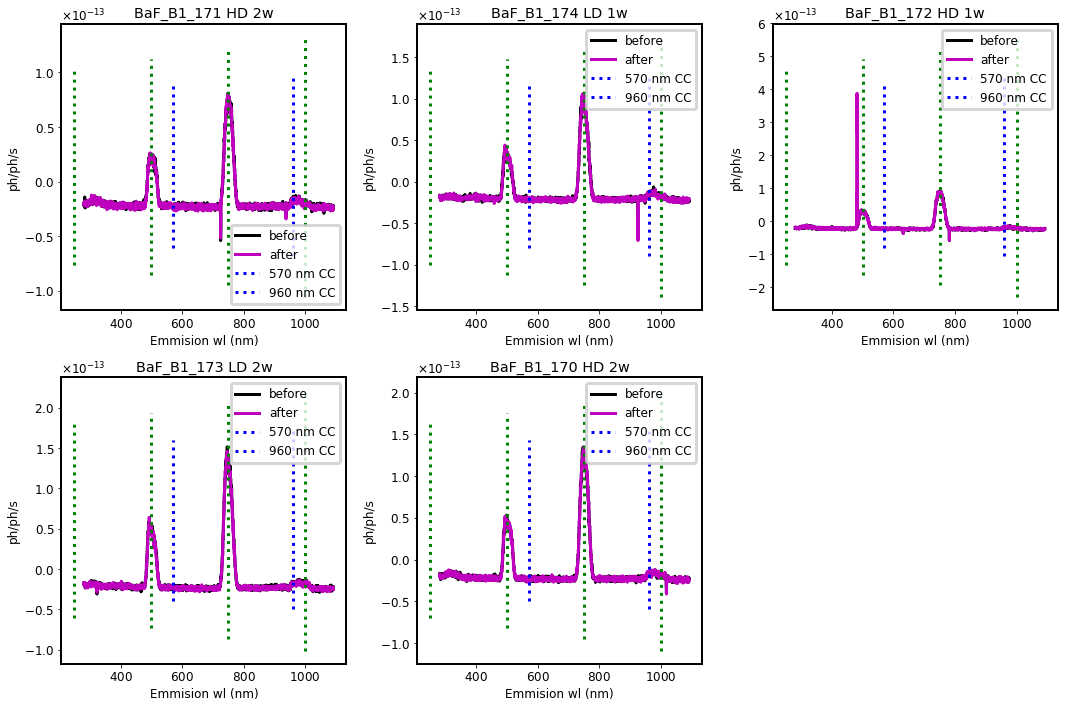

In [19]:
plot_bleach("BaF", 250)

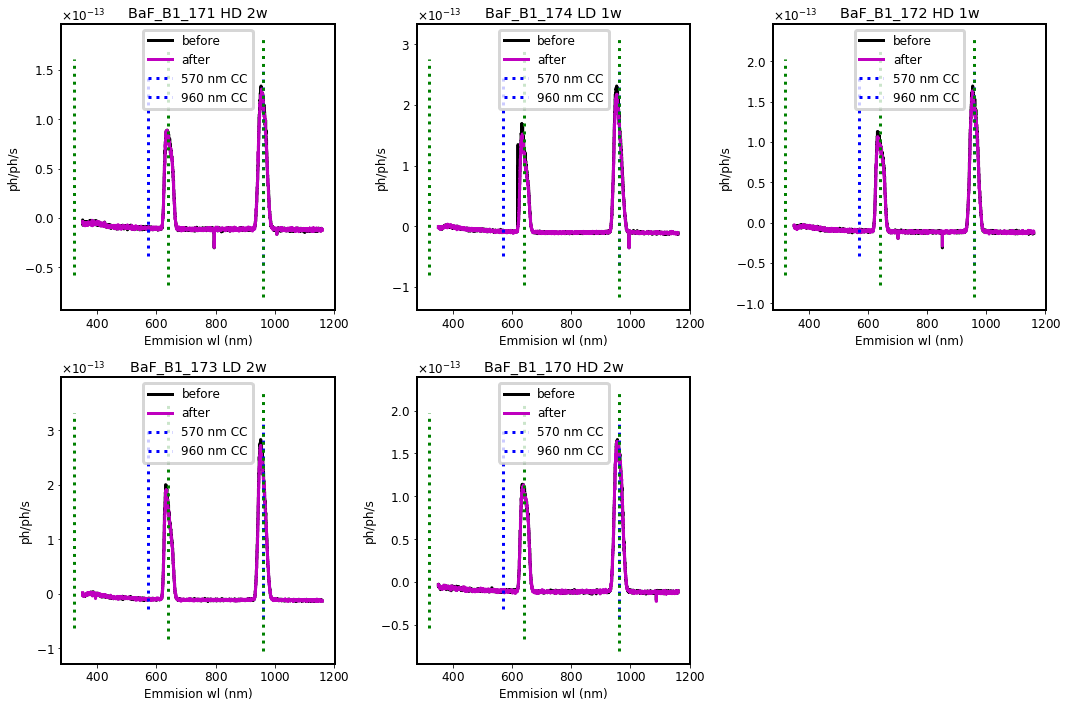

In [20]:
plot_bleach("BaF", 320)